# Intro to Deep Learning
<table align="left"><td>
  <a target="_blank"  href="https://github.com/Clemson-AI/Intro/blob/master/Intro_to_Deep_Learning_CAI.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on github
  </a>
</td><td>
  <a target="_blank"  href="https://colab.sandbox.google.com/github/Clemson-AI/Intro/blob/master/Intro_to_Deep_Learning_CAI.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
</td></table>

In [7]:
import torch
import torch.nn as nn
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow
from google.colab import files

# Pytorch Tensors
<img src="https://miro.medium.com/max/1050/0*jGB1CGQ9HdeUwlgB" width=70% height=70% alt="Tensor">

In [13]:
# Rank 1 
torch.tensor([.7, 1.4, 2.1])

tensor([0.7000, 1.4000, 2.1000])

In [14]:
# Rank 2
torch.randn(2,2)

tensor([[ 2.4337,  2.3011],
        [-0.9736,  1.5680]])

In [15]:
# Rank 4
torch.randn(2,2,2,2)

tensor([[[[-0.2927,  0.5349],
          [-1.6995,  0.3683]],

         [[ 0.5822,  0.1449],
          [ 0.6328,  0.9917]]],


        [[[-1.0349,  0.6003],
          [-0.0706, -0.9642]],

         [[-1.5919, -0.5565],
          [-0.4671, -0.0823]]]])

# Matrix Multiplication

In [16]:
t1 = torch.tensor([1.0, 2.0, 3.0])
t2 = torch.tensor([[.3, .5, .2], [.2, .5, .2]])
t3 = torch.tensor([])

In [17]:
result = t1 * t2

In [18]:
result

tensor([[0.3000, 1.0000, 0.6000],
        [0.2000, 1.0000, 0.6000]])

In [37]:
# this applies summation across rows(dim=1) dim=0 is columnss
result = torch.sum(result, dim=1)

In [42]:
result

tensor([1.9000, 1.8000])

# Defining Activation Functions

\begin{equation}

Sigmoid(x) = \sigma(x) = \dfrac{1}{1 + \exp(-x)}

\end{equation}

![Sigmoid](https://pytorch.org/docs/stable/_images/Sigmoid.png)
\begin{equation}

ReLU(x) = x^+ = max(0,x)
\end{equation}

![ReLu](https://pytorch.org/docs/stable/_images/ReLU.png)



Sigmoid

In [ ]:
# Define non linearity
sigmoid = nn.Sigmoid()
relu = nn.ReLU()

In [44]:
# Take the sigmoid of our example
sigmoid(result)

tensor([0.8699, 0.8581])

ReLU

In [45]:
# Rectified Linear Unit (ReLU)
relu(result)

tensor([1.9000, 1.8000])

# Loss

### <center>L1Loss</center>
\begin{equation}
loss = \dfrac{\sum_{i=1}^{n}∣y_i−\hat{y}_i∣}{n}
\end{equation}

### <center>Binary Cross Entropy Loss</center>
<p align="center">
  <img src="https://miro.medium.com/max/1096/1*rdBw0E-My8Gu3f_BOB6GMA.png" />
</p>

### Regression

In [ ]:
data = torch.tensor([5.0,5.0,5.0])
truth = torch.tensor([7.0,8.0,9.0])

In [28]:
# L1 Loss, mean absolute error (MAE) useful for Regression tasks
criterion = nn.L1Loss(reduction='mean')

In [ ]:
criterion(data, truth)

tensor(3.)

### Classification

In [46]:
data = torch.tensor([.34, .25, 1.0])
truth = torch.tensor([1.0, 0.0, 1.0])

In [47]:
# BCELoss is useful for Classification tasks
criterion = nn.BCELoss()

In [48]:
criterion(data, truth)

tensor(0.4555)

# Optimizer
To define an optimizer we have to import torch.optim:
https://pytorch.org/docs/stable/optim.html  
* [Adam: A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980)
* [An overview of gradient descent optimization algorithms∗](https://arxiv.org/pdf/1609.04747.pdf)

In [ ]:
import torch.optim as optim
# Define your Optimizer
#optimizer = optim.SGD(Model.parameters(), lr=0.01) 
#optimizer = optim.Adam(Model.parameters(), lr=0.01)

# Define your Loss Criterion
criterion = nn.BCELoss()

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

# Linear Layers

In [53]:
# Remember our inputs and weight
print("input: {}\nweight: {}".format(t1, t2))

input: tensor([1., 2., 3.])
weight: tensor([[0.3000, 0.5000, 0.2000],
        [0.2000, 0.5000, 0.2000]])


In [54]:
# Perceptrons are called Linear Layers in Pytorch. 
# For example, this will take 3 inputs and output 2
example = nn.Linear(3, 2, bias=False)

# Setting weights as in presentation
example.weight = nn.Parameter(t2, requires_grad=False)

In [55]:
example.weight

Parameter containing:
tensor([[0.3000, 0.5000, 0.2000],
        [0.2000, 0.5000, 0.2000]])

In [56]:
# Forward Pass
example(t1)

tensor([1.9000, 1.8000])

# Define A Neural Network
To define a network in Pytorch, we can extend nn.Module. To use functions without defining them, we can use nn.functional

In [177]:
import torch.nn.functional as F
IMG_SIZE = 150528
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        # Define your layers here
        self.fc1 = nn.Linear(in_features=IMG_SIZE, out_features=4096, bias=True)
        self.fc2 = nn.Linear(4096, 4096) # bias defaults to True if you do not set it
        self.fc3 = nn.Linear(4096, 1024)
        self.fc4 = nn.Linear(1024, 1)
        #define more here

        #define dropout
        self.dropout = nn.Dropout(p=.5)

    def forward(self, x):
        x = self.fc1(x) # Pass through first layer
        x = F.relu(x) # Apply non-linearity
        x = self.dropout(x)
        x = F.relu(self.fc2(x)) # you can also combine them like this
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)

        return torch.sigmoid(x) # Use sigmoid on final output, we want our results 0-1 (cat to dog)

In [178]:
# Create an instance of your defined model
my_model = Model()

# Dataset
Data processing is important, but we'll implement this part for you.

In [102]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   118M      0  0:00:06  0:00:06 --:--:--  130M


In [103]:
!unzip -q kagglecatsanddogs_3367a.zip

In [110]:
!ls

 kagglecatsanddogs_3367a.zip   PetImages        sample_data
'MSR-LA - 3467.docx'	      'readme[1].txt'


In [151]:
from torchvision import datasets
import torchvision.transforms as T
from torch.utils.data import DataLoader
from torch.utils.data import random_split

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

batch_size = 24

transform = T.Compose([T.RandomHorizontalFlip(),
                       T.Resize((224,224)),
                       T.ToTensor(),
                       T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                       ])


data = datasets.ImageFolder("PetImages", transform=transform)

train_data, test_data = random_split(data, [20000, 5000])
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


In [152]:
len(train_data.indices)

20000

In [153]:
from google.colab import files
files.upload()

{}

In [160]:
# Define a function that formats training images
from PIL import Image 
  
# open method used to open different extension image file 
im = Image.open("jeff.jpg")

tensor([ 0.3882,  0.3412,  0.4039,  ...,  0.0196, -0.2471, -0.4510])

# Train

# Saving and Loading

# Transfer Learning with VGG Backbone
For a more powerful model, we can use a CNN backbone. VGG-16 is a CNN. CNNs are commonly used to extract features from images. Pytorch lets us import some pretrained models from torchvision.models.  

* [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)

In [161]:
import torchvision.models as models
# vgg16 is a Convolutional Neural Network(CNN) trained on Imagenet 2014 - 1000 categories and 1.3 million images
vgg16 = models.vgg16(pretrained=True)

# Turn off training for vgg16
for param in vgg16.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [14]:
# We are going to reimplement the classifier layer for our task
# For reference, this is the original
vgg16.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

# Transfer Learning Explained
Using a pretrained VGG backbone will dramatically increase our model accuracy. If you are curious about why transfer learning works, I've attached a video by Andrew Ng. He is the founder of coursera and [deeplearning.ai](https://deeplearning.ai). You can check them out for more content and subscribe to his weekly AI newsletter, The Batch.

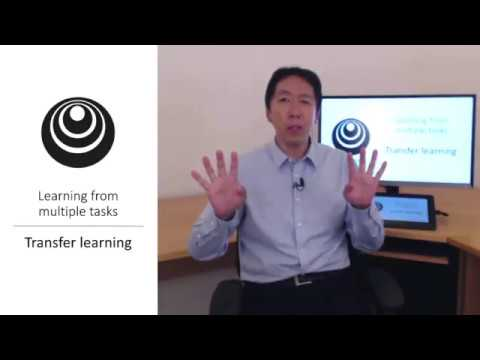

In [5]:
# Embed youtube video 
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("yofjFQddwHE", width=500)
display(video)

# Defining a Classification Layer

In [ ]:
VGG_OUT_FEATURES = vgg16.classifier[0].in_features

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        # Define your layers here
        self.fc1 = nn.Linear(in_features=VGG_OUT_FEATURES, out_features=)
        self.fc2 = nn.Linear(,)

    def forward(self, x):
        x = nn.ReLU(self.fc1(x))

        return nn.Softmax(x))

# Inference

In [172]:
im = process("jeff.jpg")

In [176]:
len(im.flatten())

150528

In [179]:
my_model(im.flatten())

tensor([0.4963], grad_fn=<SigmoidBackward>)

In [164]:
from PIL import Image 
def process(im_path):  
  im = Image.open(im_path)
  return transform(im)[:3,:,:].unsqueeze(0)

In [ ]:
# Upload your own image
files.upload()

In [ ]:
# Show your image
im = cv2.imread("jeff.jpg")
cv2_imshow(im)

In [170]:
# Process Image
im = process("jeff.jpg")

In [ ]:
# Run
prediction = Model(im)
round()
print(prediction)